#                                      IPL Analysis 2023

In [125]:
import numpy as np
import pandas as pd
import os

In [126]:
df = pd.read_csv(r"C:\Users\USER\Desktop\datascienceproject\iplauction2023.csv")
df

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED


EDA

In [127]:
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [128]:
df.describe()

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


In [129]:
df.shape

(309, 7)

In [130]:
df.isna().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

In [131]:
df

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED


In [132]:
df['final price (in lacs)'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        20.0
1         NaN
2         NaN
3       150.0
4       100.0
        ...  
304    1200.0
305     800.0
306     600.0
307    1600.0
308     900.0
Name: final price (in lacs), Length: 309, dtype: float64>

In [133]:
df['name'].dtype

dtype('O')

In [134]:
df['final price (in lacs)'].dtype

dtype('float64')

In [135]:
df.loc[df.duplicated(subset = ['name'])]

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status


In [136]:
df.columns

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

In [137]:
m =df['player style'].value_counts()
m

player style
Bowler        111
Allrounder    103
Batter         55
WK-Batter      40
Name: count, dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


In [139]:
from pandas.api.types import is_numeric_dtype

for col in df.columns:
    if is_numeric_dtype(df[col]):
        print('\nColumn: %s' % col)
        print('\tMean = %.2f' % df[col].mean())
        print('\tStandard deviation = %.2f' % df[col].std())
        print('\tMinimum = %.2f' % df[col].min())
        print('\tMaximum = %.2f' % df[col].max())


Column: base price (in lacs)
	Mean = 59.21
	Standard deviation = 59.69
	Minimum = 20.00
	Maximum = 200.00

Column: final price (in lacs)
	Mean = 368.07
	Standard deviation = 449.07
	Minimum = 20.00
	Maximum = 1850.00


In [140]:
df.isnull().sum( )

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

In [141]:
duplicates = df[df.duplicated()]
print("Number of duplicates: " ,len (duplicates) )

Number of duplicates:  0


In [142]:
df.describe()

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


In [143]:
df.dtypes

name                      object
player style              object
nationality               object
base price (in lacs)     float64
final price (in lacs)    float64
franchise                 object
status                    object
dtype: object

In [144]:
df['name'] = pd.to_numeric(df['name'], errors='coerce')
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [145]:
df_numeric.corr()

,name,base price (in lacs),final price (in lacs)
name,NaN,NaN,NaN
base price (in lacs),NaN,1.000000,0.667296
final price (in lacs),NaN,0.667296,1.000000


In [146]:
df.nunique()

name                      0
player style              4
nationality              14
base price (in lacs)      8
final price (in lacs)    67
franchise                10
status                    3
dtype: int64

In [147]:
df["nationality"].value_counts()

nationality
India           201
England          24
South Africa     19
West Indies      14
Australia        14
New Zealand      11
Sri Lanka         8
Afghanistan       7
Bangladesh        4
Ireland           2
Zimbabwe          2
Namibia           1
Netherlands       1
Singapore         1
Name: count, dtype: int64

In [148]:
df.columns

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

VISUALIZATION

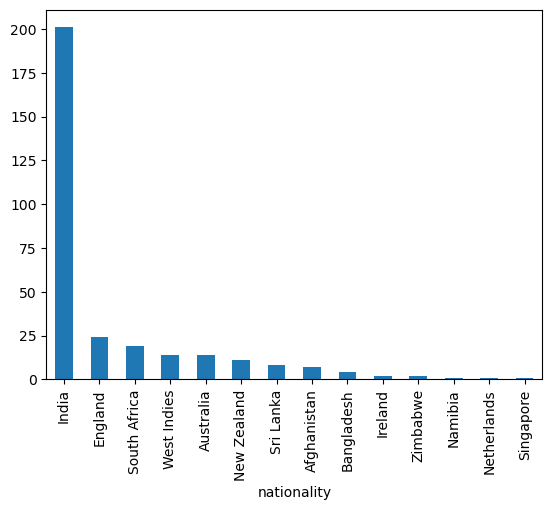

In [149]:
import matplotlib.pyplot as plt
df["nationality"].value_counts().plot(kind = 'bar')
plt.show()

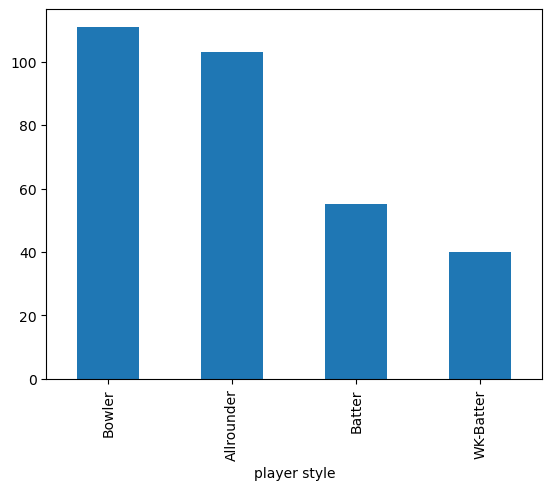

In [150]:
import matplotlib.pyplot as plt
df["player style"].value_counts().plot(kind = 'bar')
plt.show()

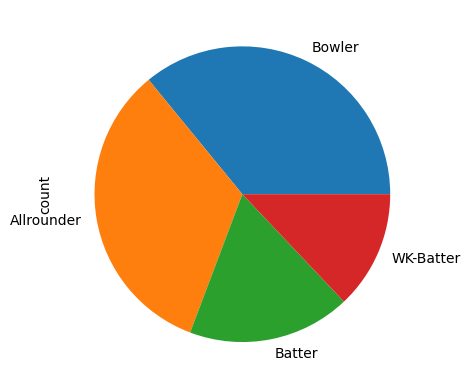

In [151]:
df["player style"].value_counts().plot(kind = 'pie')
plt.show()

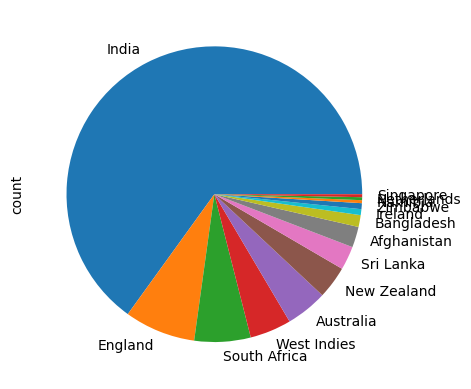

<Figure size 500x1200 with 0 Axes>

In [152]:
df["nationality"].value_counts().plot(kind = 'pie')
plt.figure(figsize=(5, 12))
plt.show()

In [153]:
df.keys()

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


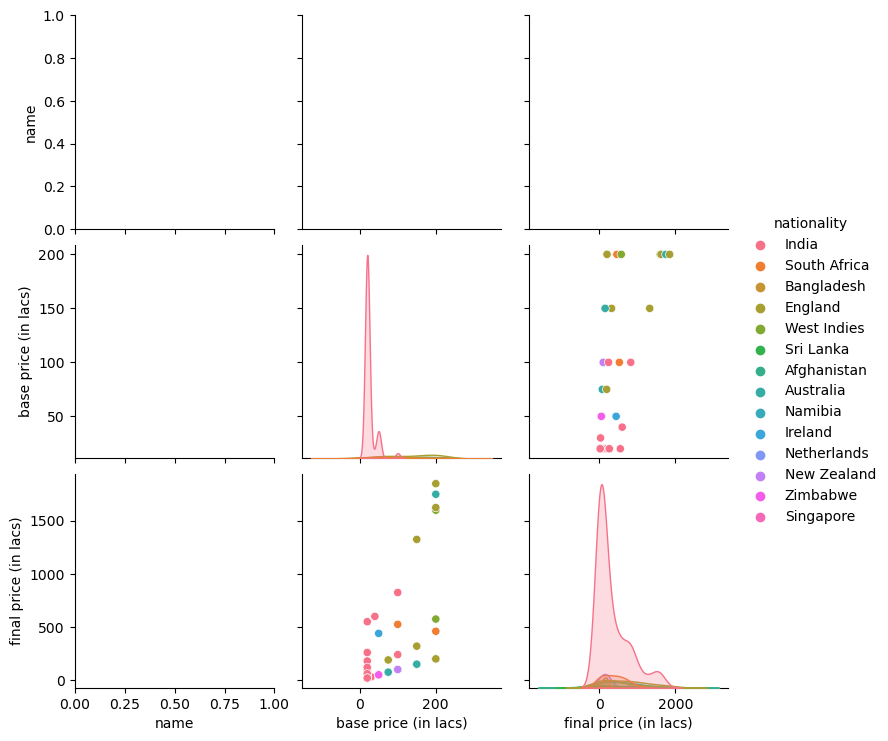

In [154]:
# visualize the whole dataset
import seaborn as sns
sns.pairplot(df, hue="nationality")
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


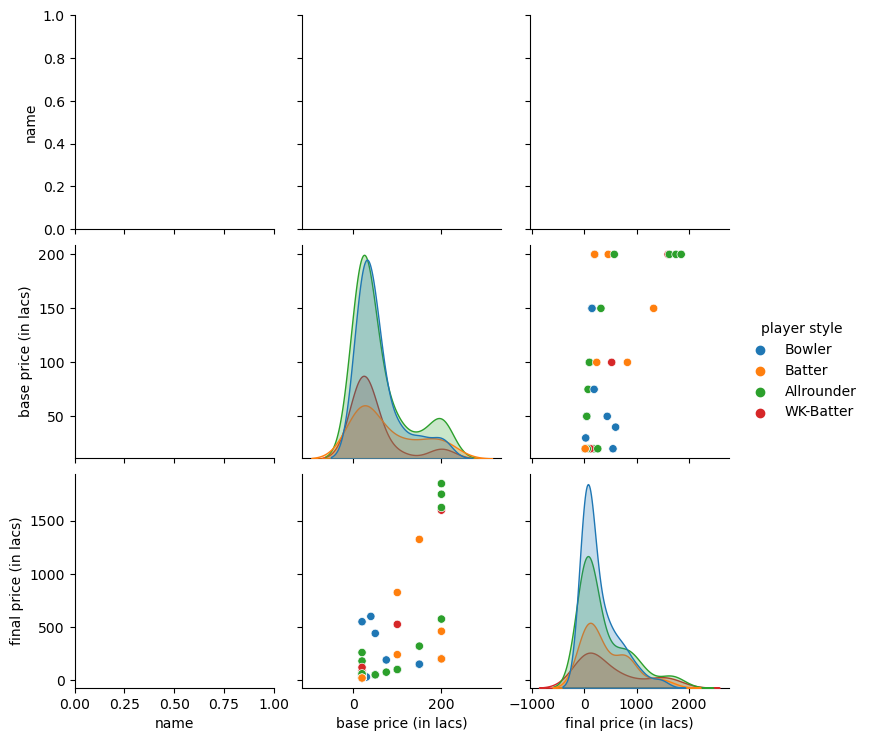

In [160]:
sns.pairplot(df, hue="player style")
plt.show()

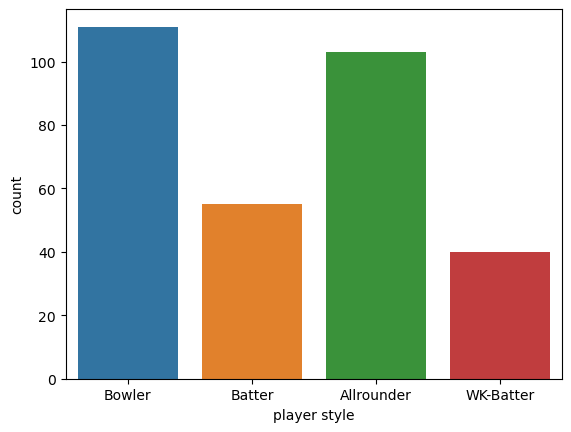

In [161]:
sns.countplot(x='player style', data=df)
plt.show()

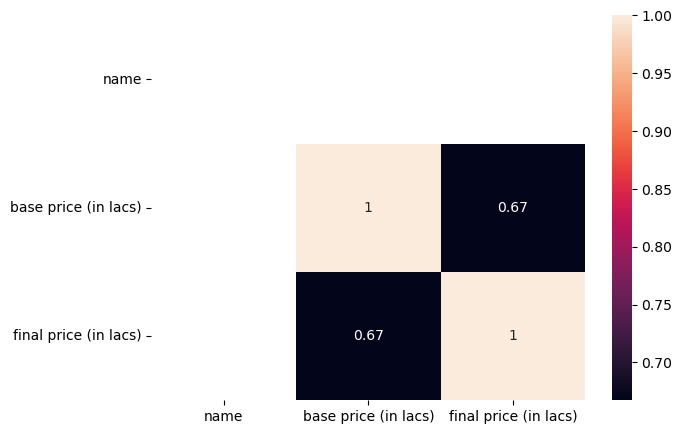

In [162]:
plt.figure(figsize=(7, 5))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

In [163]:
g1=df.groupby('player style')['base price (in lacs)'].mean().idxmax()
g2=df.groupby('player style')['base price (in lacs)'].mean().max()
g3=df.groupby('player style')['base price (in lacs)'].mean().idxmin()
g4=df.groupby('player style')['base price (in lacs)'].mean().min()

print(f'The playing style {g1} has a the highest base price on average of {round(g2,2)} lacs ')
print(f'The playing style {g3} has a the lowest base price on average of {round(g4,2)} lacs ')



The playing style Batter has a the highest base price on average of 75.65 lacs 
The playing style WK-Batter has a the lowest base price on average of 45.24 lacs 


FRANCHISE ANALYSIS

In [164]:
grp=df.groupby('franchise')['final price (in lacs)'].sum()
grp

franchise
CSK     9350.0
DC      8685.0
GT      9055.0
KKR     6410.0
LSG     9065.0
MI      9420.0
PBKS    8280.0
RCB     9325.0
RR      9165.0
SRH     8845.0
Name: final price (in lacs), dtype: float64

In [165]:
grp1=df.groupby('franchise')['final price (in lacs)'].mean().sort_values().reset_index()
grp1

,franchise,final price (in lacs)
0,KKR,337.368421
1,SRH,353.800000
2,DC,361.875000
3,GT,362.200000
4,LSG,362.600000
5,RR,366.600000
6,RCB,373.000000
7,CSK,374.000000
8,PBKS,376.363636
9,MI,409.565217


In [166]:
grp1['franchise'].values

array(['KKR', 'SRH', 'DC', 'GT', 'LSG', 'RR', 'RCB', 'CSK', 'PBKS', 'MI'],
      dtype=object)

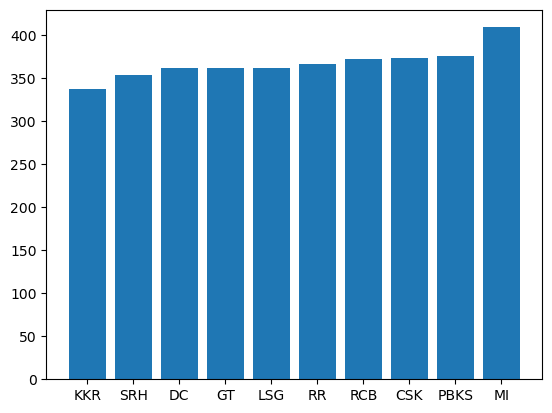

In [167]:
plt.bar(grp1['franchise'],grp1['final price (in lacs)'])
plt.show()

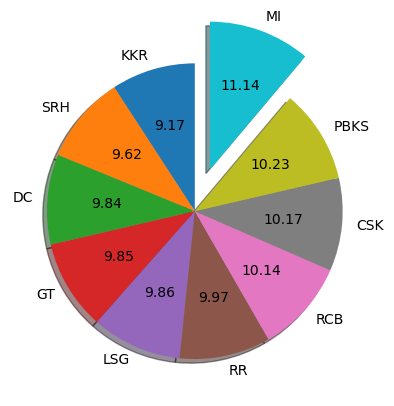

In [168]:
plt.pie(grp1['final price (in lacs)'],labels=['KKR', 'SRH', 'DC', 'GT', 'LSG', 'RR', 'RCB', 'CSK', 'PBKS', 'MI'],autopct='%1.2f',explode=[0,0,0,0,0,0,0,0,0,.3],startangle=90,shadow=True)
plt.show()

In [169]:
import pandas as pd

# Assuming df is your DataFrame containing data about statuses and franchises

# Grouping by 'status' and 'franchise', and counting occurrences
st = df.groupby('status')['franchise'].value_counts()

# Selecting counts for 'RETAINED' status
st1 = st.loc['RETAINED']

# Finding the maximum count of franchises for 'RETAINED' status
max_count = st1.max()

print("Maximum count of franchises for 'RETAINED' status:", max_count)


Maximum count of franchises for 'RETAINED' status: 19


PLAYER PRICE ANALYSIS

In [170]:
nat=df.groupby('nationality')[['base price (in lacs)','final price (in lacs)']].mean().reset_index()
nat

,nationality,base price (in lacs),final price (in lacs)
0,Afghanistan,67.500000,407.500000
1,Australia,136.428571,591.818182
2,Bangladesh,83.333333,133.333333
3,England,136.470588,745.666667
4,India,25.444444,323.456790
5,Ireland,50.000000,440.000000
6,Namibia,100.000000,100.000000
7,Netherlands,20.000000,NaN
8,New Zealand,160.000000,221.250000
9,Singapore,NaN,825.000000


In [171]:
df[df['nationality']=='Australia']

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
23,NaN,Bowler,Australia,150.0,150.0,RR,SOLD
85,NaN,Bowler,Australia,150.0,NaN,NaN,UNSOLD
89,NaN,Allrounder,Australia,75.0,75.0,LSG,SOLD
93,NaN,Allrounder,Australia,200.0,NaN,NaN,UNSOLD
106,NaN,Bowler,Australia,30.0,NaN,NaN,UNSOLD
140,NaN,Bowler,Australia,150.0,150.0,MI,SOLD
148,NaN,Allrounder,Australia,200.0,1750.0,MI,SOLD
188,NaN,Bowler,Australia,NaN,75.0,PBKS,RETAINED
218,NaN,Bowler,Australia,NaN,775.0,RCB,RETAINED
225,NaN,WK-Batter,Australia,NaN,240.0,GT,RETAINED


In [172]:
df[df['status']=='UNSOLD']['base price (in lacs)'].mean()

55.63380281690141

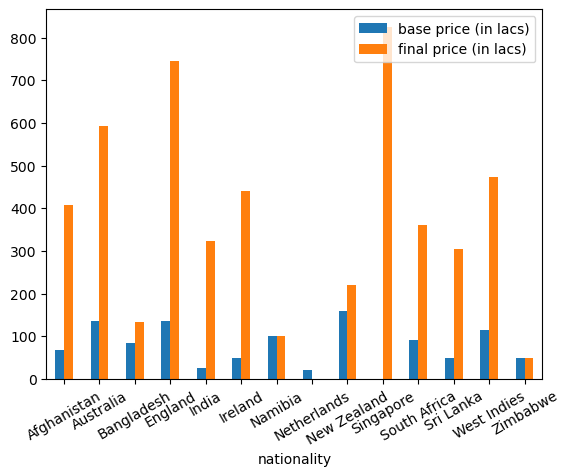

In [173]:

x_=nat['nationality']
y_=nat['base price (in lacs)']
y1=nat['final price (in lacs)']

nat.plot(kind='bar',x='nationality')
plt.xticks(rotation=30)
plt.title
plt.show()


Status Analysis:

In [174]:
stt=df['status'].value_counts().reset_index()
stt

,status,count
0,RETAINED,158
1,SOLD,80
2,UNSOLD,71


In [175]:
data=df.groupby('status')[['base price (in lacs)','final price (in lacs)']].mean().reset_index()
data

,status,base price (in lacs),final price (in lacs)
0,RETAINED,NaN,448.734177
1,SOLD,62.375000,208.750000
2,UNSOLD,55.633803,NaN


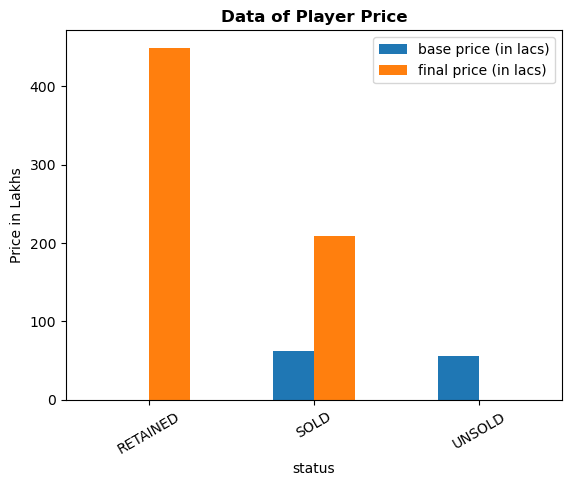

In [176]:
data.plot(kind='bar',x='status')
plt.xticks(rotation=30)
plt.ylabel('Price in Lakhs')
plt.title('Data of Player Price',fontweight='bold')
plt.show()